# DS105-02-07 - Transformations in Python

## Import Packages

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox

## Load Data

In [15]:
anime = pd.read_csv('./assets/anime.csv')

In [16]:
anime.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012


## Data Wrangling
To use `seaborn`'s best-fit curve, you must remove `null` values using `dropna`

In [17]:
anime.dropna(inplace=True)

## Visualizing Transformations
`pandas` has a function called `.hist()` that works pretty well for data normalization visualization, because it just ignores missing values. That means that you don't need to do a whole lot of data cleaning.

<AxesSubplot:>

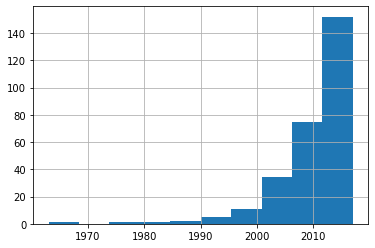

In [18]:
anime.aired_from_year.hist()

### Add best-fit curve
If you want a fitted curve, you'll need to pull from `seaborn`, using the `distplot()` function.

/Users/heather/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='aired_from_year', ylabel='Density'>

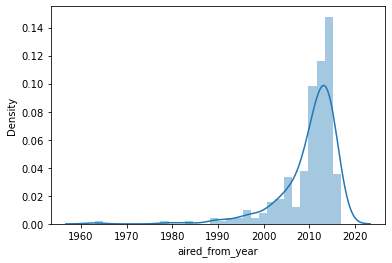

In [38]:
sns.distplot(anime['aired_from_year'])

## Transforming Postively Skewed Data
### Variable: `scored_by` — positively skewed

<AxesSubplot:>

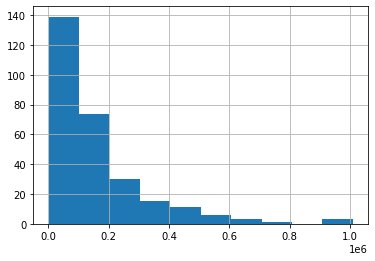

In [20]:
anime.scored_by.hist()

### Square Root Transformation using `np.sqrt()` from `numpy`

In [21]:
anime['scored_bySQRT'] = np.sqrt(anime['scored_by'])

<AxesSubplot:>

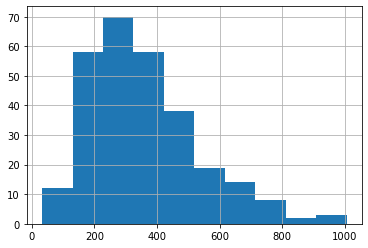

In [22]:
anime.scored_bySQRT.hist()

### Log Transformation using `np.log()` from `numpy`

In [23]:
anime['scored_byLOG'] = np.log(anime['scored_by'])

<AxesSubplot:>

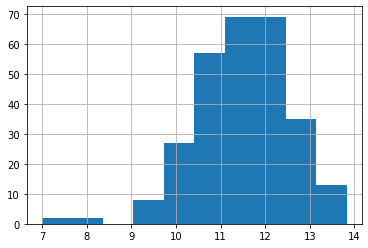

In [24]:
anime.scored_byLOG.hist()

## Transforming Negatively Skewed Data
### Variable: `aired_from_year` — negatively skewed

<AxesSubplot:>

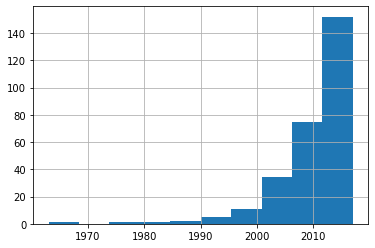

In [25]:
anime.aired_from_year.hist()

### Square Transformation

In [26]:
anime['aired_from_yearSQ'] = anime['aired_from_year']**2

<AxesSubplot:>

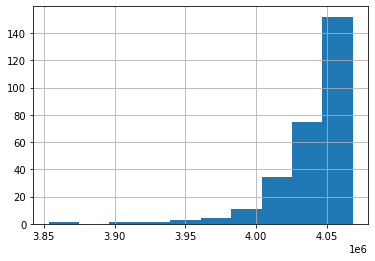

In [27]:
anime.aired_from_yearSQ.hist()

### Cube Transformation

In [28]:
anime['aired_from_yearCUBE'] = anime['aired_from_year']**3

<AxesSubplot:>

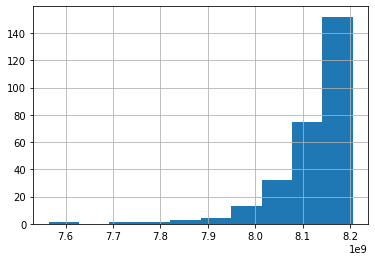

In [29]:
anime.aired_from_yearCUBE.hist()

## BoxCox Transformation
Just like the Tukey's Ladder of Power Transformations in R, you can transform by power in Python as well. However, the Python version, called `boxcox()`, has limited functionality.

It does not seem to work well for <i>negatively skewed data</i> (so check your results very carefully!), and it does not automatically transform your data, unlike R. It just runs off a power system.

Requires:
```
from scipy import stats
from scipy.stats import boxcox
```

Use the `boxcox()` function, and specify the variable.
Then the last argument is the power value that you learned about at the beginning of this lesson. A power of `0` is a log transformation.

In [33]:
anime['scored_byLOG1'] = boxcox(anime['scored_by'],0)

<AxesSubplot:>

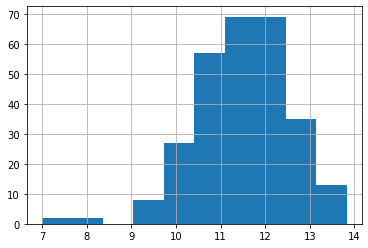

In [34]:
anime.scored_byLOG1.hist()

### END